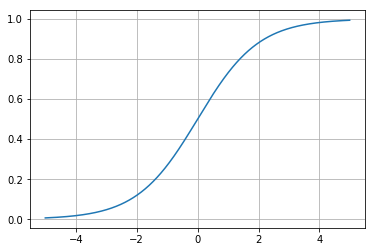

In [1]:
# グラフのインライン表示
%matplotlib inline
# ライブラリのインポート
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):                   # シグモイド関数
    return 1 / (1 + np.exp(-x))

# -5.0から5.0までを0.01刻みにした等差数列
x = np.arange(-5.0, 5.0, 0.01)    
y = sigmoid(x) # 等差数列を引数にしてシグモイド関数を実行
plt.plot(x,    # 等差数列をx軸に設定
         y)    # シグモイド関数の結果をy軸にしてグラフを描く
plt.grid(True) # グリッドを表示
plt.show()

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def standardize(x):
    '''
        標準化を行う
        ------------
        x : 標準化前のx1、x2
    '''
    x_mean = x.mean(axis=0)   # 列ごとの平均値を求める
    std = x.std(axis=0)       # 列ごとの標準偏差を求める
    return (x - x_mean) / std # 標準化した値を返す

def create_matrix(x):
    '''
        データx1、x2にバイアスに対応するx0を加えた行列を作成
    '''
    x0 = np.ones([x.shape[0], 1]) # バイアスに対応する1の項
    return np.hstack([x0, x])     # x0,x1,x2の行列を返す

def sigmoid(X, parameter):
    '''
        シグモイド関数
        ------------
        X         : x0、x1、x2の行列
        parameter : w0,w1,w3のベクトル
    '''
    return 1 / (1 + np.exp(-np.dot(X, parameter)))

def logistic_regression(X, t):
    '''
        ロジスティック回帰による二値分類の学習を行う
        ------------
        X : x0、x1、x2の行列
        t : 正解ラベル
    '''
    parameter = np.random.rand(3) # w0,w1,w2を初期化
    LNR = 1e-3                    # 学習率を0.001に設定
    loop = 2000                   # 更新回数
    count = 1                     # 処理回数をカウントする変数

    for i in range(loop):         # 学習をloop回繰り返す
        # w0,w1,w2の更新
        parameter = parameter - LNR*np.dot(
            sigmoid(X,parameter) - t,
            X
            )
        # 最初の1回と以降100回ごとにログを出力
        if (count == 1 or count % 100 == 0):
            print('{}回: parameter = {}'.format(count, parameter))        
        count += 1               # カウンター変数の値を1増やす
        
    return parameter             # 学習後のw0、w1、w2を返す

In [3]:
# 学習データを読み込む
data = np.loadtxt(
    'MaleFemale2.csv',   # 読み込むファイル
    dtype='int',         # データ型を指定
    delimiter=',',       # 区切り文字を指定
    skiprows=1           # 1行目のタイトルを読み飛ばす
    )
x = data[:,0:2]          # x1、x2を行列xに代入
t = data[:,2]            # 3列目のデータをtに代入
x_std = standardize(x)   # xのすべての成分を標準化
X = create_matrix(x_std) # 標準化したxにバイアス対応の1の項を追加する

# パラメーターの値を学習する
parameter = logistic_regression(X, t)

1回: parameter = [ 0.54542414  0.37839821 -0.00098014]
100回: parameter = [ 0.33914685  0.41127069 -0.40941024]
200回: parameter = [ 0.21210458  0.52024788 -0.68714729]
300回: parameter = [ 0.13675803  0.65471892 -0.89559362]
400回: parameter = [ 0.09277619  0.79334326 -1.06764504]
500回: parameter = [ 0.06810273  0.92857339 -1.21863546]
600回: parameter = [ 0.05543968  1.05816928 -1.3561118 ]
700回: parameter = [ 0.05025097  1.18180494 -1.48409126]
800回: parameter = [ 0.04967108  1.29979048 -1.60489212]
900回: parameter = [ 0.05187503  1.41260469 -1.7199571 ]
1000回: parameter = [ 0.05569768  1.52073224 -1.83024576]
1100回: parameter = [ 0.06039671  1.62461388 -1.93643317]
1200回: parameter = [ 0.06550245  1.72463668 -2.03901703]
1300回: parameter = [ 0.07072168  1.82113749 -2.13837874]
1400回: parameter = [ 0.07587541  1.91440964 -2.23482013]
1500回: parameter = [ 0.0808585   2.00470976 -2.32858661]
1600回: parameter = [ 0.08561336  2.09226351 -2.41988231]
1700回: parameter = [ 0.09011268  2.17727044

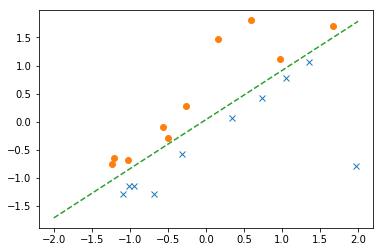

In [4]:
# x軸の値として-2から2までの等差数列を生成
x0 = np.linspace(start=-2, # 数列の始点
                 stop=2,   # 数列の終点
                 num=1100  # 等差数列の要素数
                 )

# t == 1のデータをプロット
plt.plot(x_std[t == 1, 0],
         x_std[t == 1, 1], 'x')
# t == 0のデータをプロット
plt.plot(x_std[t == 0, 0],
         x_std[t == 0, 1], 'o')
# 決定境界をプロット
plt.plot(x0,
         -(parameter[0] + parameter[1] * x0) / parameter[2],
         linestyle='dashed'
         )
plt.show()

In [5]:
sigmoid(
    create_matrix(
        standardize(np.array([[50, 40],    # x1が大きい
                              [10, 20],    # x2が大きい
                              [100, 110]]) # x2が大きい
        )
    ),
    parameter             # 学習後の重み
)

array([0.74587196, 0.47037325, 0.34255605])

In [6]:
(sigmoid(
    create_matrix(standardize(
        np.array([[50, 40],    # x1が大きい
                  [10, 20],    # x2が大きい
                  [100, 120]]) # x2が大きい
        )),
    parameter                  # 学習後の重み
) >= 0.5).astype(np.int)       # sigmoid()の戻り値が
                               # 0.5以上であれば1、
                               # そうでなければ0を返す

array([1, 0, 0])